### Evaluation of Named Entity Recognition (NER) Model Using Confusion Matrix

#### Aim & Problem Statement: 
- Aim: To evaluate the performance of a Named Entity Recognition (NER) model using a confusion matrix by comparing manually annotated ground-truth labels with model-predicted labels.
- Problem Statement:
Train or use a pre-trained NER model (spaCy) and evaluate its predictions on sports-related text using precision, recall, F1-score, and a confusion matrix.

#### Why Evaluation Is Needed
Natural Language Processing models are not perfect

Even if NER model identifies entities, we must answer
- How many entities were correctly identified?
- How many were missed?
- How many were wrongly classified 

To answer these questions scientifically, we use
- Confusion Matrix
- Precision
- Recall
- F1-Score 


#### Step 1: Dataset Finalization
Why this step exusts:
- A confusion matrix requires ground truth (actual labels)
- Since sports-specific labeled NER datasets are not available, we manually create a gold-standard dataset.

What I did:
- Selected 20 sports-related sentences 
- Tokenized them 
- Assigned BIO labels manually 


#### Step 2: Import Required Libraries 


In [3]:
# Core libraries 
import nltk
import spacy

# Evaluation Libraries 
from sklearn.metrics import confusion_matrix, classification_report

# Download tokenizer 
# nltk.download("punkt")
from nltk.tokenize import word_tokenize

Why these libraries?
- nltk -> tokenization 
- spaCy -> NER prediction
- sklearn -> confusion matrix 
- pandas -> tabular display

#### Step 3: Manually Labeled Dataset 

In [4]:
dataset = []

def add(sentence, labels):
    tokens = word_tokenize(sentence)
    assert len(tokens) == len(labels), "Token-label mismatch!"
    dataset.append(list(zip(tokens, labels)))

add("Chennai Super Kings won the IPL trophy.",
    ["B-ORG", "I-ORG", "I-ORG", "O", "O", "B-MISC", "O", "O"])

add("La Liga is a competitive football league.",
    ["B-MISC", "I-MISC", "O", "O", "O", "O", "O", "O"])

add("Ahmedabad hosted the World Cup final.",
    ["B-LOC", "O", "O", "B-MISC", "I-MISC", "O", "O"])

add("BCCI appointed Gautam Gambhir as head coach.",
    ["B-ORG", "O", "B-PER", "I-PER", "O", "O", "O", "O"])

add("Real Madrid plays at Santiago Bernabeu.",
    ["B-ORG", "I-ORG", "O", "O", "B-LOC", "I-LOC", "O"])

add("Virat Kohli plays for Royal Challengers Bangalore.",
    ["B-PER", "I-PER", "O", "O", "B-ORG", "I-ORG", "I-ORG", "O"])

add("FIFA organizes the World Cup every four years.",
    ["B-ORG", "O", "O", "B-MISC", "I-MISC", "O", "O", "O", "O"])

add("Anfield is known for its atmosphere in Liverpool.",
    ["B-LOC", "O", "O", "O", "O", "O", "O", "B-LOC", "O"])

add("Bayern Munich defeated Barcelona in Lisbon.",
    ["B-ORG", "I-ORG", "O", "B-ORG", "O", "B-LOC", "O"])

add("Wimbledon is the oldest tennis tournament.",
    ["B-MISC", "O", "O", "O", "O", "O", "O"])

add("Eden Gardens hosted the KKR match.",
    ["B-LOC", "I-LOC", "O", "O", "B-ORG", "O", "O"])

add("Mohammed Shami took wickets in the World Cup.",
    ["B-PER", "I-PER", "O", "O", "O", "O", "B-MISC", "I-MISC", "O"])

add("Old Trafford is the home of Manchester United.",
    ["B-LOC", "I-LOC", "O", "O", "O", "O", "B-ORG", "I-ORG", "O"])

add("Hardik Pandya left Gujarat Titans for Mumbai Indians.",
    ["B-PER", "I-PER", "O", "B-ORG", "I-ORG", "O", "B-ORG", "I-ORG", "O"])

add("Sourav Ganguly was the president of BCCI.",
    ["B-PER", "I-PER", "O", "O", "O", "O", "B-ORG", "O"])

add("Premier League is popular in India.",
    ["B-MISC", "I-MISC", "O", "O", "O", "B-LOC", "O"])

add("Vinicius Junior plays for Real Madrid.",
    ["B-PER", "I-PER", "O", "O", "B-ORG", "I-ORG", "O"])

add("Arun Jaitley Stadium is located in Delhi.",
    ["B-LOC", "I-LOC", "I-LOC", "O", "O", "O", "B-LOC", "O"])

add("Team India departed for South Africa today.",
    ["O", "B-LOC", "O", "O", "B-LOC", "I-LOC", "O", "O"])

add("Euro 2024 was an exciting tournament.",
    ["B-MISC", "I-MISC", "O", "O", "O", "O", "O"])

add("Kolkata Knight Riders celebrated their victory at Eden Gardens.",
    ["B-ORG", "I-ORG", "I-ORG", "O", "O", "O", "O", "B-LOC", "I-LOC", "O"])

add("The Border-Gavaskar Trophy is played between India and Australia.",
    ["O", "B-MISC", "I-MISC", "O", "O", "O", "B-LOC", "O", "B-LOC", "O"])

add("Xavi Hernandez managed Barcelona before Hansi Flick took over.",
    ["B-PER", "I-PER", "O", "B-ORG", "O", "B-PER", "I-PER", "O", "O", "O"])

add("Dharamsala Stadium offers a great view of the Himalayas.",
    ["B-LOC", "I-LOC", "O", "O", "O", "O", "O", "O", "B-LOC", "O"])

add("The Champions League final will be held in Munich.",
    ["O", "B-MISC", "I-MISC", "O", "O", "O", "O", "O", "B-LOC", "O"])

add("Sunil Chhetri is the captain of the Indian football team.",
    ["B-PER", "I-PER", "O", "O", "O", "O", "O", "B-LOC", "O", "O", "O"])

add("Manchester City signed Erling Haaland from Borussia Dortmund.",
    ["B-ORG", "I-ORG", "O", "B-PER", "I-PER", "O", "B-ORG", "I-ORG", "O"])

add("The Ashes is a famous cricket series between England and Australia.",
    ["O", "B-MISC", "O", "O", "O", "O", "O", "O", "B-LOC", "O", "B-LOC", "O"])

add("Neeraj Chopra won a gold medal at the Tokyo Olympics.",
    ["B-PER", "I-PER", "O", "O", "O", "O", "O", "O", "B-MISC", "I-MISC", "O"])

add("Lionel Messi played for Barcelona for many years.",
    ["B-PER", "I-PER", "O", "O", "B-ORG", "O", "O", "O", "O"])

add("The T20 World Cup was held in the West Indies.",
    ["O", "B-MISC", "I-MISC", "I-MISC", "O", "O", "O", "O", "B-LOC", "I-LOC", "O"])

add("Ansu Fati returned to the Ciutat Esportiva Joan Gamper.",
    ["B-PER", "I-PER", "O", "O", "O", "B-LOC", "I-LOC", "I-LOC", "I-LOC", "O"])

add("Shubman Gill opened the innings at the Gabba.",
    ["B-PER", "I-PER", "O", "O", "O", "O", "O", "B-LOC", "O"])

add("The Santiago Bernabeu hosted the Copa Libertadores final.",
    ["O", "B-LOC", "I-LOC", "O", "O", "B-MISC", "I-MISC", "O", "O"])

add("Mohun Bagan and East Bengal are rivals in Kolkata.",
    ["B-ORG", "I-ORG", "O", "B-ORG", "I-ORG", "O", "O", "O", "B-LOC", "O"])

add("Kylian Mbappe joined Real Madrid in the summer window.",
    ["B-PER", "I-PER", "O", "B-ORG", "I-ORG", "O", "O", "O", "O", "O"])

add("The ISL has improved the quality of football in India.",
    ["O", "B-MISC", "O", "O", "O", "O", "O", "O", "O", "B-LOC", "O"])

add("San Siro is shared by AC Milan and Inter Milan.",
    ["B-LOC", "I-LOC", "O", "O", "O", "B-ORG", "I-ORG", "O", "B-ORG", "I-ORG", "O"])

add("Pat Cummins led Australia to a World Test Championship win.",
    ["B-PER", "I-PER", "O", "B-LOC", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O", "O"])

add("Pep Guardiola implemented tiki-taka at Barcelona.",
    ["B-PER", "I-PER", "O", "O", "O", "B-ORG", "O"])

print(f"Dataset successfully created with {len(dataset)} sentences.")

Dataset successfully created with 40 sentences.


In [5]:
# Load pre-trained spaCy NER model
nlp = spacy.load("en_core_web_sm")

#### Step 4: Collect Actual & Predicted Labels 


In [6]:
actual_labels= []

# data extraction
for sentence in dataset:
    for token, label in sentence:
        actual_labels.append(label)

print("Total actual labels: ", len(actual_labels))

Total actual labels:  358


In [7]:
predicted_labels = []

for sentence in dataset:
    text = " ".join(token for token, _ in sentence)
    doc = nlp(text)

    for token in doc:
        if token.ent_type_ == "":
            predicted_labels.append("O")
        else:
            predicted_labels.append(token.ent_iob_ + "-" + token.ent_type_)

print("Total predicted labels:", len(predicted_labels))

Total predicted labels: 362


In [32]:
# Ambiguity in the labels 
print(len(actual_labels) == len(predicted_labels))
for sentence in dataset:
    tokens_nltk = [t for t, l in sentence]
    text = " ".join(tokens_nltk)
    doc = nlp(text)
    
    if len(tokens_nltk) != len(doc):
        print(f"Mismatch found!")
        print(f"Original: {tokens_nltk} (Length: {len(tokens_nltk)})")
        print(f"SpaCy saw: {[t.text for t in doc]} (Length: {len(doc)})")
        print("-" * 30)

False
Mismatch found!
Original: ['The', 'Border-Gavaskar', 'Trophy', 'is', 'played', 'between', 'India', 'and', 'Australia', '.'] (Length: 10)
SpaCy saw: ['The', 'Border', '-', 'Gavaskar', 'Trophy', 'is', 'played', 'between', 'India', 'and', 'Australia', '.'] (Length: 12)
------------------------------
Mismatch found!
Original: ['Pep', 'Guardiola', 'implemented', 'tiki-taka', 'at', 'Barcelona', '.'] (Length: 7)
SpaCy saw: ['Pep', 'Guardiola', 'implemented', 'tiki', '-', 'taka', 'at', 'Barcelona', '.'] (Length: 9)
------------------------------


#### Step 5: Confusion Matrix
It shows how many times:
- A true label was predicted correctly 
- Or predicted incorrectly as another label 



In [8]:
# Define Label Set 

labels = sorted(set(actual_labels + predicted_labels))
# Set removes all duplicates, leaving only unique tags 

label_to_index = {label: i for i, label in enumerate(labels)}
# It assigns a number (index) to each number 

Build The Confusion Matrix

In [9]:
import numpy as np

matrix = np.zeros((len(labels), len(labels)), dtype=int)
# np.zeros(...): Creates a grid filled entirely with zeros.
# Defines the shape. If you have 5 unique labels.
# dtype = int: Ensures the numbers in the grid. 

for actual, predicted in zip(actual_labels, predicted_labels):
    i = label_to_index[actual]
    j = label_to_index[predicted]
    matrix[i][j] += 1

Display Confusion Matrix

In [10]:
import pandas as pd

confusion_df = pd.DataFrame(matrix, index=labels, columns=labels)
confusion_df

,B-DATE,B-EVENT,B-FAC,B-GPE,B-LOC,B-MISC,B-NORP,B-ORG,B-PER,B-PERSON,...,I-EVENT,I-FAC,I-GPE,I-LOC,I-MISC,I-NORP,I-ORG,I-PER,I-PERSON,O
B-DATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-EVENT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-FAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-GPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-LOC,0,0,1,8,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,15
B-MISC,0,1,0,0,0,0,0,1,0,1,...,3,0,0,0,0,0,0,0,0,10
B-NORP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B-ORG,0,0,0,3,0,0,1,6,0,1,...,0,0,0,1,0,0,2,0,2,8
B-PER,0,0,0,5,0,0,0,2,0,4,...,1,0,2,0,0,0,1,0,1,1
B-PERSON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Step 6: Label Normalization

In [11]:
def normalize_label(label):
    """
    Normalize labels into a common schema so that
    ground truth and spaCy predictions match.
    """

    # Outside label
    if label == "O":
        return "O"

    # Remove BIO prefix if present
    if "-" in label:
        label = label.split("-")[1]

    # Map spaCy labels to dataset labels
    label_mapping = {
        "PERSON": "PER",
        "PER": "PER",

        "ORG": "ORG",

        "GPE": "LOC",
        "LOC": "LOC",
        "FAC": "LOC",

        "NORP": "MISC",
        "EVENT": "MISC",
        "MISC": "MISC",

        "DATE": "DATE"
    }

    return label_mapping.get(label, "O")


In [12]:
actual_general = []
predicted_general = []

for a, p in zip(actual_labels, predicted_labels):
    actual_general.append(normalize_label(a))
    predicted_general.append(normalize_label(p))

In [13]:
from collections import Counter

print("Actual generalized labels:", Counter(actual_general))
print("Predicted generalized labels:", Counter(predicted_general))

Actual generalized labels: Counter({'O': 208, 'ORG': 43, 'LOC': 43, 'PER': 34, 'MISC': 30})
Predicted generalized labels: Counter({'O': 218, 'LOC': 39, 'ORG': 37, 'PER': 32, 'MISC': 24, 'DATE': 8})


In [14]:
general_labels = sorted(set(actual_general + predicted_general))
label_to_index_general = {label: i for i, label in enumerate(general_labels)}

print(general_labels)

['DATE', 'LOC', 'MISC', 'O', 'ORG', 'PER']


#### Step 7: Generalized Confusion Matrix


In [15]:
general_matrix = np.zeros((len(general_labels), len(general_labels)), dtype=int)

for actual, predicted in zip(actual_general, predicted_general):
    i = label_to_index_general[actual]
    j = label_to_index_general[predicted]
    general_matrix[i][j] +=1

In [16]:
general_confusion_df = pd.DataFrame(
    general_matrix,
    index = general_labels,
    columns= general_labels
)

general_confusion_df

,DATE,LOC,MISC,O,ORG,PER
DATE,0,0,0,0,0,0
LOC,0,14,0,24,3,2
MISC,1,0,11,14,2,2
O,7,12,9,151,15,14
ORG,0,6,3,17,12,5
PER,0,7,1,12,5,9


#### Step 8: Calculation for Accuracy, Precision, Recall, F1-Score 
Accuracy: Measures overall correctness 


In [17]:
# Accuracy
correct = 0
total = len(actual_general)

for a, p in zip(actual_general, predicted_general):
    if a==p:
        correct+=1

accuracy = correct/ total
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.55


- Precision: How many predicted entities are correct 
- Recall: How many actual entities were found
- F1-score: Balance between Precision & Recall

In [20]:
import pandas as pd

metrics_data = []

for label in general_labels:
    idx = label_to_index_general[label]

    TP = general_matrix[idx][idx]
    FP = general_matrix[:, idx].sum() - TP
    FN = general_matrix[idx, :].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) != 0 else 0

    metrics_data.append([label, TP, FP, FN, precision, recall, f1])

# Create DataFrame for metrics
metrics_df = pd.DataFrame(
    metrics_data,
    columns=["Entity", "TP", "FP", "FN", "Precision", "Recall", "F1-Score"]
)

metrics_df


,Entity,TP,FP,FN,Precision,Recall,F1-Score
0,DATE,0,8,0,0.000000,0.000000,0.000000
1,LOC,14,25,29,0.358974,0.325581,0.341463
2,MISC,11,13,19,0.458333,0.366667,0.407407
3,O,151,67,57,0.692661,0.725962,0.708920
4,ORG,12,25,31,0.324324,0.279070,0.300000
5,PER,9,23,25,0.281250,0.264706,0.272727


#### Step 9: Error Analysis

Run Ner On Each Sentence and Store Result

In [34]:
sentence_results = []

for sentence in dataset:
    # Join tokens back to sentence text
    text = " ".join([token for token, label in sentence])

    doc = nlp(text)

    sent_tokens = []
    
    for (token, actual_label), spacy_token in zip(sentence, doc):
        
        # Get spaCy prediction in BIO format
        if spacy_token.ent_type_ == "":
            pred_label = "O"
        else:
            pred_label = spacy_token.ent_iob_ + "-" + spacy_token.ent_type_

        sent_tokens.append((token, actual_label, pred_label))

    sentence_results.append(sent_tokens)

Normalize Labels Using Fixed Functions

In [35]:
normalized_results = []

for sentence in sentence_results:
    temp = []
    for token, actual, predicted in sentence:
        temp.append((
            token,
            normalize_label(actual),
            normalize_label(predicted)
        ))
    normalized_results.append(temp)


Display in Sentence Format

In [36]:
for i, sentence in enumerate(normalized_results):
    
    errors = [(t,a,p) for (t,a,p) in sentence if a != p]

    if errors:
        print(f"\nErrors in Sentence {i+1}:")

        for token, actual, predicted in errors:
            print(f"{token}  ->  Actual: {actual} , Predicted: {predicted}")



Errors in Sentence 1:
Chennai  ->  Actual: ORG , Predicted: O
Super  ->  Actual: ORG , Predicted: O
Kings  ->  Actual: ORG , Predicted: O
IPL  ->  Actual: MISC , Predicted: ORG

Errors in Sentence 2:
La  ->  Actual: MISC , Predicted: PER
Liga  ->  Actual: MISC , Predicted: PER

Errors in Sentence 3:
Ahmedabad  ->  Actual: LOC , Predicted: O
the  ->  Actual: O , Predicted: MISC

Errors in Sentence 5:
Real  ->  Actual: ORG , Predicted: O
Madrid  ->  Actual: ORG , Predicted: LOC
Santiago  ->  Actual: LOC , Predicted: ORG
Bernabeu  ->  Actual: LOC , Predicted: ORG

Errors in Sentence 6:
Virat  ->  Actual: PER , Predicted: ORG
Kohli  ->  Actual: PER , Predicted: ORG

Errors in Sentence 7:
FIFA  ->  Actual: ORG , Predicted: O
the  ->  Actual: O , Predicted: MISC
four  ->  Actual: O , Predicted: DATE
years  ->  Actual: O , Predicted: DATE

Errors in Sentence 8:
Anfield  ->  Actual: LOC , Predicted: PER

Errors in Sentence 9:
Barcelona  ->  Actual: ORG , Predicted: LOC

Errors in Sentence 12:

Entity-Wise Error Display

In [37]:
def show_errors_for_entity(entity):

    print(f"\nErrors for entity: {entity}")

    for i, sentence in enumerate(normalized_results):
        for token, actual, predicted in sentence:
            if actual == entity and actual != predicted:
                print(f"Sentence {i+1}: {token}  |  Actual: {actual}  |  Predicted: {predicted}")


In [38]:
show_errors_for_entity("PER")
show_errors_for_entity("ORG")
show_errors_for_entity("LOC")
show_errors_for_entity("MISC")


Errors for entity: PER
Sentence 6: Virat  |  Actual: PER  |  Predicted: ORG
Sentence 6: Kohli  |  Actual: PER  |  Predicted: ORG
Sentence 17: Vinicius  |  Actual: PER  |  Predicted: ORG
Sentence 17: Junior  |  Actual: PER  |  Predicted: ORG
Sentence 27: Erling  |  Actual: PER  |  Predicted: LOC
Sentence 27: Haaland  |  Actual: PER  |  Predicted: LOC
Sentence 29: Neeraj  |  Actual: PER  |  Predicted: ORG
Sentence 29: Chopra  |  Actual: PER  |  Predicted: ORG
Sentence 30: Lionel  |  Actual: PER  |  Predicted: O
Sentence 36: Kylian  |  Actual: PER  |  Predicted: ORG
Sentence 36: Mbappe  |  Actual: PER  |  Predicted: ORG
Sentence 40: Pep  |  Actual: PER  |  Predicted: O
Sentence 40: Guardiola  |  Actual: PER  |  Predicted: O

Errors for entity: ORG
Sentence 1: Chennai  |  Actual: ORG  |  Predicted: O
Sentence 1: Super  |  Actual: ORG  |  Predicted: O
Sentence 1: Kings  |  Actual: ORG  |  Predicted: O
Sentence 5: Real  |  Actual: ORG  |  Predicted: O
Sentence 5: Madrid  |  Actual: ORG  |  

#### Step 10: Conclusion


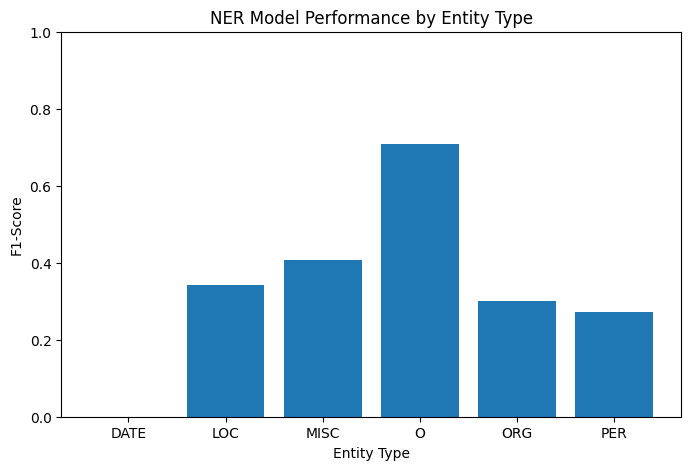

In [39]:
import matplotlib.pyplot as plt

entities = metrics_df["Entity"]
f1_scores = metrics_df["F1-Score"]

plt.figure(figsize=(8,5))
plt.bar(entities, f1_scores)

plt.title("NER Model Performance by Entity Type")
plt.xlabel("Entity Type")
plt.ylabel("F1-Score")
plt.ylim(0,1)

plt.show()

#### Entity Types Correctly Recognized
From the evaluation results and confusion matrix, the following observations can be made regarding correctly recognized entities:
The model performed best on the “O (non-entity)” category, achieving the highest F1-score.
Common non-entity words such as verbs, articles, and general vocabulary were correctly identified as outside entities most of the time.
Some MISC entities such as tournament names (e.g., “IPL”, “World Cup”) were recognized with moderate accuracy.
A few clear and well-known organization names like “UEFA” and “FIFA” were occasionally classified correctly as ORG.
Simple location names that appear frequently in general text, such as “Delhi” or “Lisbon,” were sometimes identified properly as LOC.
Overall, the model is reasonably effective at identifying non-entity tokens and a small portion of well-defined entities.


#### Entity Types That Are Confused
The analysis of misclassified tokens and the confusion matrix highlights several major confusion patterns:
- DATE Entities Not Recognized at All:
The model completely failed to correctly recognize DATE entities. All DATE predictions were either false positives or false negatives, resulting in zero precision, recall, and F1-score for DATE. This indicates that the dataset contained very few clear date expressions and the pre-trained model could not correctly detect sports-related temporal phrases.
- ORG vs LOC Confusion:
Team names such as “Barcelona,” “Manchester City,” and “Real Madrid” were frequently predicted as LOC instead of ORG because these names also represent real-world cities.
- PERSON vs ORG Confusion:
Player names like “Virat Kohli,” “Erling Haaland,” and “Lionel Messi” were often misclassified as organizations or labeled as O.
MISC Recognition Issues:
Competition names such as “Champions League” and “Border-Gavaskar Trophy” were often tagged incorrectly as ORG or not recognized at all.
- High False Negatives:
Many true entities were labeled as O, leading to low recall values for PER, ORG, and LOC categories.
These confusions occur mainly because the spaCy model is trained on general text and not on sports-specific data, causing it to misinterpret domain-specific terms.